# Class imbalance Problem Handling

In [5]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve,accuracy_score,recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Import DataSet
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

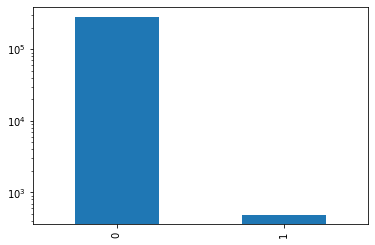

In [8]:
print(df.Class.value_counts())
df.Class.value_counts().plot.bar(logy=True)

In [9]:
# Check for row level duplicates 
print("original shape of dataframe :-",df.shape)
print("shape of dataframe after duplicate removal :-",df.drop_duplicates().shape)
# We have duplicates , so lets remove it 
df=df.drop_duplicates()
print(df.Class.value_counts())

original shape of dataframe :- (284807, 31)
shape of dataframe after duplicate removal :- (283726, 31)
0    283253
1       473
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Correlation with Class'}>

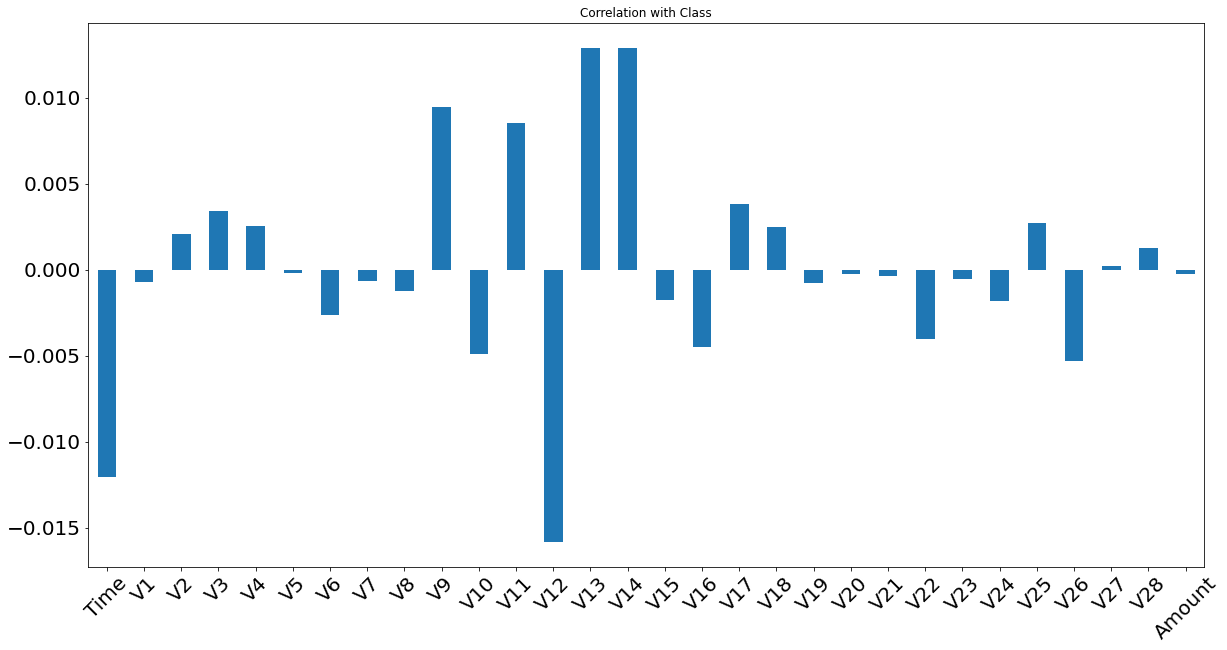

In [10]:
#Apply feature Scaling

from sklearn.preprocessing import StandardScaler
x=df.drop('Class',axis=1)
y=df['Class']
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.corrwith(df.Class).plot.bar(figsize = (20, 10), title = "Correlation with Class", fontsize = 20,rot = 45, grid = False)

<AxesSubplot:>

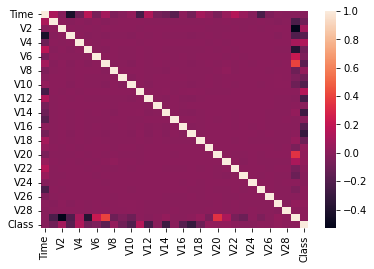

In [11]:
sns.heatmap(df.corr())

# Logistic_Regresion, Decision_Tree, Random_Forest

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [13]:
models={'Logisitc regression': LogisticRegression(),
       'Decision tree classifier' : DecisionTreeClassifier(), 
       'Random forest Classifier': RandomForestClassifier() }

def model_fit(model, x_train, y_train, x_test, y_test, model_name): 
    model_cur = model.fit(x_train,y_train)
    predictions = model_cur.predict(x_test)
    model_evaluation(y_test,predictions,model_name)
    
def model_evaluation(y_test, predictions, model_name): 
    print('f1 score for '+model_name+ ' is \n'+str(classification_report(y_test,predictions)))

In [14]:
# execution time approx 3.30 min
for model_name,model in models.items(): 
    model_fit(model,x_train,y_train,x_test,y_test,model_name)

f1 score for Logisitc regression is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.55      0.68       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118

f1 score for Decision tree classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.71      0.75      0.73       134

    accuracy                           1.00     85118
   macro avg       0.86      0.87      0.86     85118
weighted avg       1.00      1.00      1.00     85118

f1 score for Random forest Classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.73      0.83       134

    accuracy                           1.00     85118
   macr

# DATA Level Approach
#     1. SMOTE
#     2. RUS

# SMOTE
# ==========================

In [15]:
from collections import Counter
print(Counter(y_train))

Counter({0: 198269, 1: 339})


In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_TrainSMOTE, y_TrainSMOTE = sm.fit_resample(x_train, y_train)

In [17]:
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_TrainSMOTE))

Before SMOTE :  Counter({0: 198269, 1: 339})
After SMOTE :  Counter({0: 198269, 1: 198269})


In [18]:
# execution time approx 6.30 min
for model_name,model in models.items(): 
    model_fit(model,X_TrainSMOTE,y_TrainSMOTE,x_test,y_test,model_name)

f1 score for Logisitc regression is 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.06      0.90      0.10       134

    accuracy                           0.98     85118
   macro avg       0.53      0.94      0.55     85118
weighted avg       1.00      0.98      0.99     85118

f1 score for Decision tree classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.37      0.76      0.50       134

    accuracy                           1.00     85118
   macro avg       0.68      0.88      0.75     85118
weighted avg       1.00      1.00      1.00     85118

f1 score for Random forest Classifier is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.88      0.79      0.83       134

    accuracy                           1.00     85118
   macr

# RUS
# ==========================

In [19]:
from sklearn.utils import resample

In [20]:
x_under = x_train.copy()
x_under['Class'] = y_train

x_maj_under = x_under[x_under.Class==0]
x_min_under = x_under[x_under.Class==1]

x_maj_under_rus = resample(x_maj_under,replace=False,n_samples=len(x_min_under),random_state=42)
x_under_rus = pd.concat([x_maj_under_rus, x_min_under])

# print("Before RUS : ", Counter(x_under['Class']))
print("After RUS : ", Counter(x_under_rus['Class']))

x_train_under_rus = x_under_rus.drop(['Class'], axis=1)
y_train_under_rus = x_under_rus.Class

After RUS :  Counter({0.0: 240, 1.0: 240})


In [21]:
# execution time approx less than a min
for model_name,model in models.items(): 
    model_fit(model,x_train_under_rus,y_train_under_rus,x_test,y_test,model_name)

f1 score for Logisitc regression is 
              precision    recall  f1-score   support

           0       1.00      0.61      0.75     84984
           1       0.00      0.89      0.01       134

    accuracy                           0.61     85118
   macro avg       0.50      0.75      0.38     85118
weighted avg       1.00      0.61      0.75     85118

f1 score for Decision tree classifier is 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     84984
           1       0.00      0.75      0.00       134

    accuracy                           0.50     85118
   macro avg       0.50      0.63      0.34     85118
weighted avg       1.00      0.50      0.67     85118

f1 score for Random forest Classifier is 
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     84984
           1       0.00      0.84      0.01       134

    accuracy                           0.60     85118
   macr

#    ALGORITHM Level Approach
# 1. Cost Sensitive Learning
# 2. Ensemble Method
# 3. One Class Learning

# CSL - Logistics Regressin
# =============================

f1 score for CSL - Logistic Regression is 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.06      0.90      0.11       134

    accuracy                           0.98     85118
   macro avg       0.53      0.94      0.55     85118
weighted avg       1.00      0.98      0.99     85118

Accuracy Score: 0.9775958081721845
Area Under Curve: 0.9366238034622144
Recall score: 0.8955223880597015


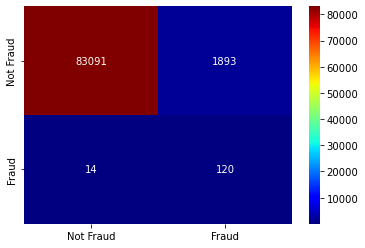

In [59]:
# execution time less than a min
LgR_model_CS = LogisticRegression(class_weight='balanced')
LgR_cur_CS = LgR_model_CS.fit(x_train,y_train)
LgR_predictions_CS=LgR_cur_CS.predict(x_test)
model_name = 'CSL - Logistic Regression'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(y_test,LgR_predictions_CS)))

print(f'Accuracy Score: {accuracy_score(y_test, LgR_predictions_CS)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, LgR_predictions_CS)}')
print(f'Area Under Curve: {roc_auc_score(y_test, LgR_predictions_CS)}')
print(f'Recall score: {recall_score(y_test, LgR_predictions_CS)}')


confm = confusion_matrix(y_test, LgR_predictions_CS)
columns = ['Not Fraud','Fraud']
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)
ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

**Experimenting with different weights for the minority class**

In [23]:
weight_arr = [1, 5, 10 ,50, 100, 150 , 200]
recall_list=[]
f1_score_list=[]
accuracy_list=[]
roc_list=[]
ypred_list=[]
prob_list=[]

for w in weight_arr:
    print('---Weight of {} for Fraud class---'.format(w))
    LgR_model_CS = LogisticRegression(class_weight={0:1,1:w})
    LgR_cur_CS = LgR_model_CS.fit(x_train, y_train)
    LgR_predictions_CS=LgR_cur_CS.predict(x_test)

    prob_list.append(roc_curve(y_test,LgR_model_CS.predict_proba(x_test)[:,1]))
    ypred_list.append(LgR_predictions_CS)
    accuracy_list.append(accuracy_score(y_test,LgR_predictions_CS))
    recall_list.append(recall_score(y_test,LgR_predictions_CS))
    f1_score_list.append(f1_score(y_test,LgR_predictions_CS))
    roc_list.append(roc_auc_score(y_test, LgR_predictions_CS))

    print(f'Accuracy Score: {accuracy_score(y_test,LgR_predictions_CS)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, LgR_predictions_CS)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, LgR_predictions_CS)}')
    print(f'Recall score: {recall_score(y_test,LgR_predictions_CS)}')
    print(f'f1 score: {f1_score(y_test,LgR_predictions_CS)}')
    print('\n\n')

---Weight of 1 for Fraud class---
Accuracy Score: 0.9991658638595832
Confusion Matrix: 
[[84973    11]
 [   60    74]]
Area Under Curve: 0.7760546849204978
Recall score: 0.5522388059701493
f1 score: 0.6757990867579908



---Weight of 5 for Fraud class---
Accuracy Score: 0.9992833478230222
Confusion Matrix: 
[[84957    27]
 [   34   100]]
Area Under Curve: 0.8729754749269748
Recall score: 0.746268656716418
f1 score: 0.7662835249042146



---Weight of 10 for Fraud class---
Accuracy Score: 0.9992481026339904
Confusion Matrix: 
[[84948    36]
 [   28   106]]
Area Under Curve: 0.8953105834847226
Recall score: 0.7910447761194029
f1 score: 0.7681159420289855



---Weight of 50 for Fraud class---
Accuracy Score: 0.9981907469630396
Confusion Matrix: 
[[84854   130]
 [   24   110]]
Area Under Curve: 0.9096829113399396
Recall score: 0.8208955223880597
f1 score: 0.5882352941176471



---Weight of 100 for Fraud class---
Accuracy Score: 0.9957940741088841
Confusion Matrix: 
[[84647   337]
 [   21   

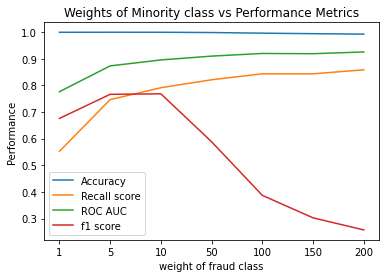

In [24]:
plt.plot(accuracy_list)
plt.plot(recall_list)
plt.plot(roc_list)
plt.plot(f1_score_list)
plt.title('Weights of Minority class vs Performance Metrics')
plt.ylabel('Performance')
plt.xlabel('weight of fraud class')
plt.xticks(range(len(weight_arr)),weight_arr)
plt.legend(['Accuracy','Recall score','ROC AUC','f1 score'], loc='best')
plt.show()

# Ensemble - SMOTEBoost & RUSBoost
# =================================

# AdaBoost

In [25]:
# execution time approx 9.30 min
def adaboost(X_train, X_test, y_train):
    model = AdaBoostClassifier(n_estimators=500, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    return y_pred
# AdaBoost
y_baseline = adaboost(x_train, x_test, y_train)

f1 score for AdaBoost is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.92      0.76      0.83       134

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Accuracy Score: 0.9995183157499001
Confusion Matrix: 
[[84975     9]
 [   32   102]]
Area Under Curve: 0.8805440637816284
Recall score: 0.7611940298507462


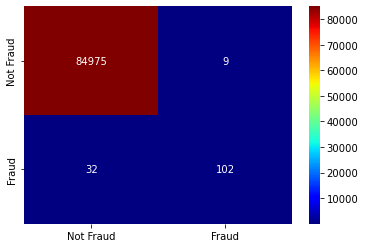

In [60]:
model_name = 'AdaBoost'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(y_test, y_baseline)))

print(f'Accuracy Score: {accuracy_score(y_test, y_baseline)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_baseline)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_baseline)}')
print(f'Recall score: {recall_score(y_test, y_baseline)}')

confm = confusion_matrix(y_test, y_baseline)
columns = ['Not Fraud','Fraud']
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)
ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

# SMOTE + AdaBOOST

In [27]:
# execution time approx 22.00 min
# SMOTE
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
y_smote = adaboost(x_train_sm, x_test, y_train_sm)

f1 score for SMOTE + AdaBoost is 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84984
           1       0.17      0.85      0.29       134

    accuracy                           0.99     85118
   macro avg       0.59      0.92      0.64     85118
weighted avg       1.00      0.99      1.00     85118

Accuracy Score: 0.9933034140839775
Area Under Curve: 0.9221372310995152
Recall score: 0.8507462686567164


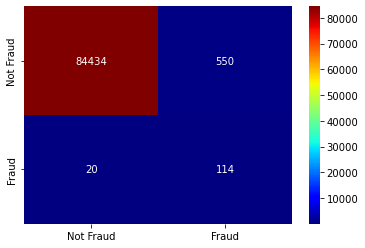

In [62]:
model_name = 'SMOTE + AdaBoost'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(y_test, y_smote)))

print(f'Accuracy Score: {accuracy_score(y_test, y_smote)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_smote)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_smote)}')
print(f'Recall score: {recall_score(y_test, y_smote)}')

confm = confusion_matrix(y_test, y_smote)
columns = ['Not Fraud','Fraud']
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)
ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

# RUS + AdaBOOST

In [29]:
# RUS
x_full = x_train.copy()
x_full['Class'] = y_train
x_maj = x_full[x_full.Class==0]
x_min = x_full[x_full.Class==1]
x_maj_rus = resample(x_maj,replace=False,n_samples=len(x_min),random_state=22)
x_rus = pd.concat([x_maj_rus, x_min])
x_train_rus = x_rus.drop(['Class'], axis=1)
y_train_rus = x_rus.Class
y_rus = adaboost(x_train_rus, x_test, y_train_rus)

f1 score for RUS + AdaBoost is 
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     84984
           1       0.00      0.81      0.01       134

    accuracy                           0.58     85118
   macro avg       0.50      0.69      0.37     85118
weighted avg       1.00      0.58      0.73     85118

Accuracy Score: 0.5800535726873282
Confusion Matrix: 
[[49265 35719]
 [   26   108]]
Area Under Curve: 0.6928337520249642
Recall score: 0.8059701492537313


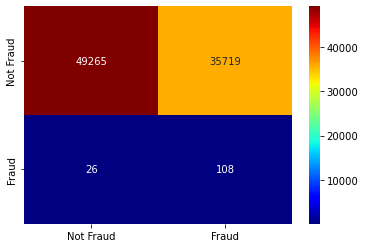

In [63]:
model_name = 'RUS + AdaBoost'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(y_test, y_rus)))

print(f'Accuracy Score: {accuracy_score(y_test, y_rus)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_rus)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_rus)}')
print(f'Recall score: {recall_score(y_test, y_rus)}')

confm = confusion_matrix(y_test, y_rus)
columns = ['Not Fraud','Fraud']
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)
ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

# RUSBoost

In [31]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=100, random_state=42)

In [32]:
#execution time approx  min
rusboost.fit(x_train, y_train)
y_rusboost = rusboost.predict(x_test)

In [33]:
model_name = 'RUSBoost'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(y_test, y_rusboost)))

print(f'Accuracy Score: {accuracy_score(y_test, y_rusboost)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_rusboost)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_rusboost)}')
print(f'Recall score: {recall_score(y_test, y_rusboost)}')

f1 score for RUSBoost is 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84984
           1       0.04      0.81      0.08       134

    accuracy                           0.97     85118
   macro avg       0.52      0.89      0.54     85118
weighted avg       1.00      0.97      0.98     85118

Accuracy Score: 0.9726144881223713
Confusion Matrix: 
[[82679  2305]
 [   26   108]]
Area Under Curve: 0.8894236983678052
Recall score: 0.8059701492537313


# SMOTEBoost

In [34]:
# execution time approx  min
def smoteboost(x_train_sm, X_test, y_train_sm):
    sm = SMOTE(random_state=42)    
    model = AdaBoostClassifier(n_estimators=1, random_state=42)
    for i in range(10):
        x_train_sm, y_train_sm = sm.fit_resample(x_train_sm, y_train_sm) 
        model.fit(x_train_sm,y_train_sm)
    
    y_pred = model.predict(X_test)
    return y_pred

y_smoteboost = smoteboost(x_train, x_test, y_train)

In [35]:
model_name = 'SMOTEBoost'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(y_test, y_smoteboost)))

print(f'Accuracy Score: {accuracy_score(y_test, y_smoteboost)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_smoteboost)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_smoteboost)}')
print(f'Recall score: {recall_score(y_test, y_smoteboost)}')

f1 score for SMOTEBoost is 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.08      0.82      0.14       134

    accuracy                           0.98     85118
   macro avg       0.54      0.90      0.57     85118
weighted avg       1.00      0.98      0.99     85118

Accuracy Score: 0.9841984069174557
Confusion Matrix: 
[[83663  1321]
 [   24   110]]
Area Under Curve: 0.9026757099843904
Recall score: 0.8208955223880597


# One Class Learner

In [36]:
from sklearn import preprocessing
Y = np.array(df["Class"])
scaler=preprocessing.MinMaxScaler()
X = np.array(scaler.fit_transform(df.drop(["Class"],axis=1)))

X.shape,Y.shape

((283726, 30), (283726,))

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((198608, 30), (85118, 30), (198608,), (85118,))

In [38]:
np.unique(Y,return_counts=True)

(array([0, 1], dtype=int64), array([283253,    473], dtype=int64))

In [41]:
from sklearn import svm
np.unique(Y_train,return_counts=True)

(array([0, 1], dtype=int64), array([198282,    326], dtype=int64))

In [42]:
def get_label_index(Y):
  labels_index = []
  for i in range(2):
    idx = np.where(Y==i)[0]
    labels_index.append(idx)
  return labels_index
labi = get_label_index(Y_train)
len(labi)

2

In [43]:
svmmodel = svm.OneClassSVM(nu=0.0008)
svmmodel.fit(X_train[labi[0]])
y_pred_svm = svmmodel.predict(X_test)

In [44]:
np.unique(y_pred_svm,return_counts=True)

(array([-1,  1], dtype=int64), array([  153, 84965], dtype=int64))

In [45]:
y_pred_svm[np.where(y_pred_svm == 1)] = 0
y_pred_svm[np.where(y_pred_svm == -1)] = 1

f1 score for One Class SVM is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84971
           1       0.41      0.43      0.42       147

    accuracy                           1.00     85118
   macro avg       0.71      0.71      0.71     85118
weighted avg       1.00      1.00      1.00     85118

Accuracy Score: 0.9979557790361616
Confusion Matrix: 
[[84881    90]
 [   84    63]]
Area Under Curve: 0.7137561218365257
Recall score: 0.42857142857142855


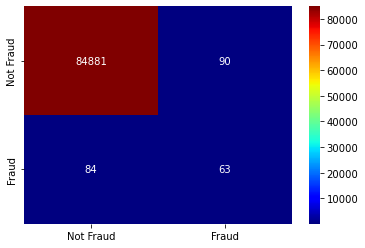

In [64]:
# print(classification_report(Y_test,y_pred_svm))
model_name = 'One Class SVM'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(Y_test,y_pred_svm)))

print(f'Accuracy Score: {accuracy_score(Y_test,y_pred_svm)}')
print(f'Confusion Matrix: \n{confusion_matrix(Y_test,y_pred_svm)}')
print(f'Area Under Curve: {roc_auc_score(Y_test,y_pred_svm)}')
print(f'Recall score: {recall_score(Y_test,y_pred_svm)}')

confm = confusion_matrix(Y_test, y_pred_svm)
columns = ['Not Fraud','Fraud']
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)
ax = sns.heatmap(df_cm, cmap='jet',annot=True,fmt='g')

# SVM

In [47]:
svcmodel = svm.SVC(gamma="scale")

In [48]:
svcmodel.fit(X_train,Y_train)

SVC()

In [49]:
y_pred_svc = svcmodel.predict(X_test)

In [50]:
# print(classification_report(Y_test,y_pred_svc))
model_name = 'SVM'
print('f1 score for '+model_name+ ' is \n'+str(classification_report(Y_test,y_pred_svc)))

print(f'Accuracy Score: {accuracy_score(Y_test,y_pred_svc)}')
print(f'Confusion Matrix: \n{confusion_matrix(Y_test,y_pred_svc)}')
print(f'Area Under Curve: {roc_auc_score(Y_test,y_pred_svc)}')
print(f'Recall score: {recall_score(Y_test,y_pred_svc)}')

f1 score for SVM is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84971
           1       0.82      0.79      0.80       147

    accuracy                           1.00     85118
   macro avg       0.91      0.89      0.90     85118
weighted avg       1.00      1.00      1.00     85118

Accuracy Score: 0.9993303414083977
Confusion Matrix: 
[[84945    26]
 [   31   116]]
Area Under Curve: 0.8944048297550417
Recall score: 0.7891156462585034
